# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

import geopandas as gpd
from shapely.geometry import LineString
import contextily as ctx 

import sys
import os

sys.path.append(os.path.abspath('../src'))

from EDA import *

In [2]:
# Display settings for visualizations
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# Dataset loading
df = pd.read_parquet('../data/processed/enriched_dataset.parquet')
df.columns

Index(['driver_id', 'trip_id', 'segment_id', 'segment_datetime',
       'published_date', 'signup_date', 'fixed_signup_country',
       'is_main_segment', 'unit_seat_price_eur', 'seat_offered_count',
       'seat_left_count', 'confirmed_seat_count', 'segment_distance_km',
       'from_lat', 'from_lon', 'to_lat', 'to_lon', 'is_auto_accept_mode',
       'publication_site_id', 'success', 'fixed_signup_country_grouped',
       'signup_country_missing', 'hours_before_departure',
       'driver_account_age_days', 'driver_trip_count', 'departure_hour',
       'departure_weekday', 'is_weekend', 'is_holiday',
       'segment_cluster_popularity', 'from_cluster_popularity',
       'to_cluster_popularity', 'price_per_km', 'is_long_trip',
       'price_x_popularity', 'seats_x_distance'],
      dtype='object')

## Study of the taget variable (success)

Target distribution (success):
success
False    0.866783
True     0.133217
Name: proportion, dtype: float64 



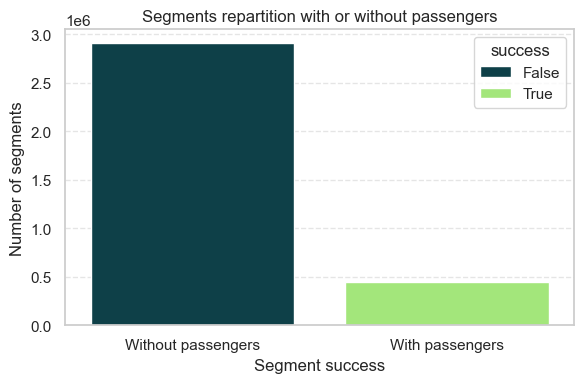

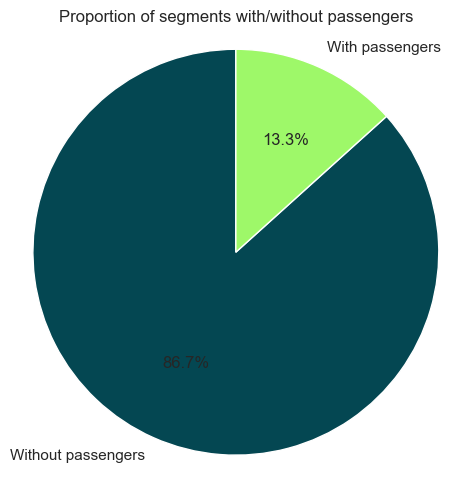

In [ ]:
# Sumary of success
print("Target distribution (success):")
print(df['success'].value_counts(normalize=True), "\n")

# Setting colors
colors = ['#044752', '#9EF869']

# Countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='success', data=df, palette=colors, hue='success')
plt.xticks([0, 1], ['Without passengers', 'With passengers'])
plt.title("Segments repartition with or without passengers")
plt.xlabel("Segment success")
plt.ylabel("Number of segments")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
labels = ['Without passengers', 'With passengers']
sizes = df['success'].value_counts().sort_index()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proportion of segments with/without passengers")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Bivariate analysis

### Quantitative variables

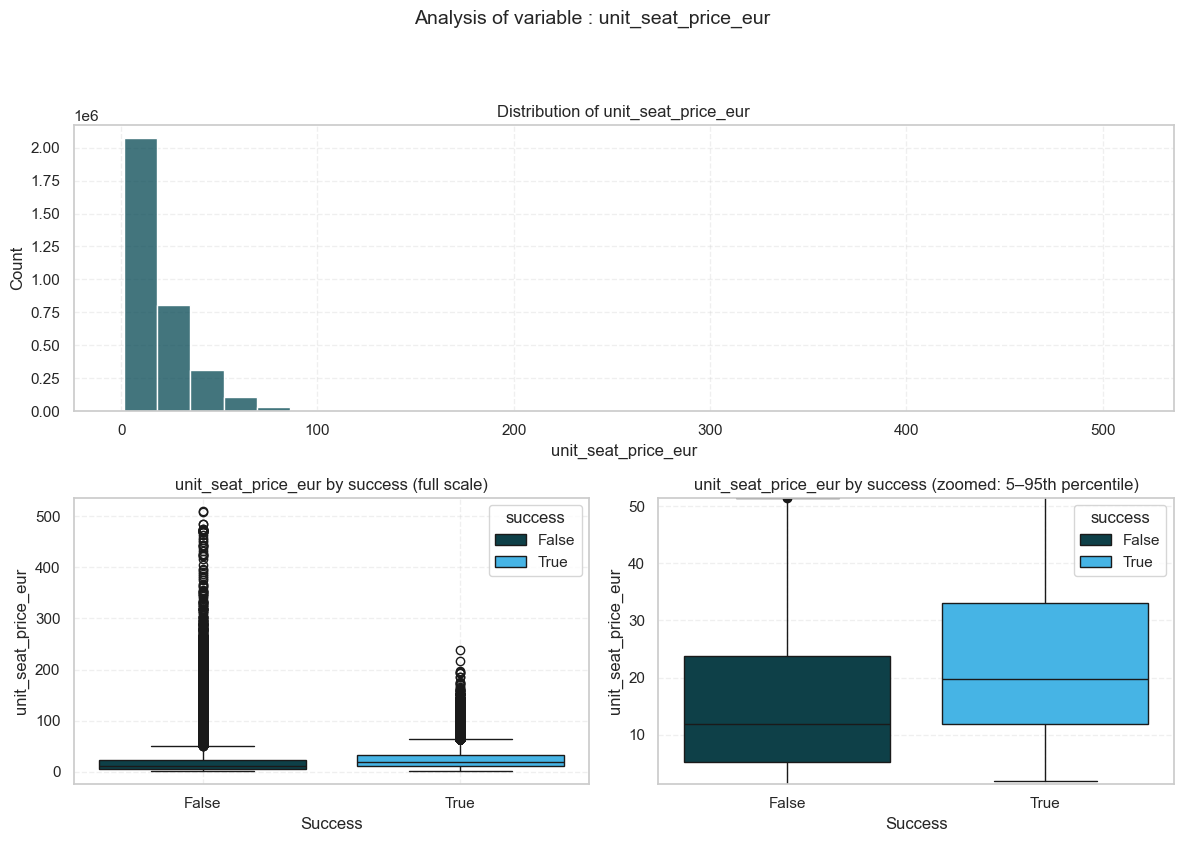

Mean of unit_seat_price_eur - Success : 23.87 | Failure : 17.40
Median of unit_seat_price_eur - Success : 19.80 | Failure : 11.88
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.38



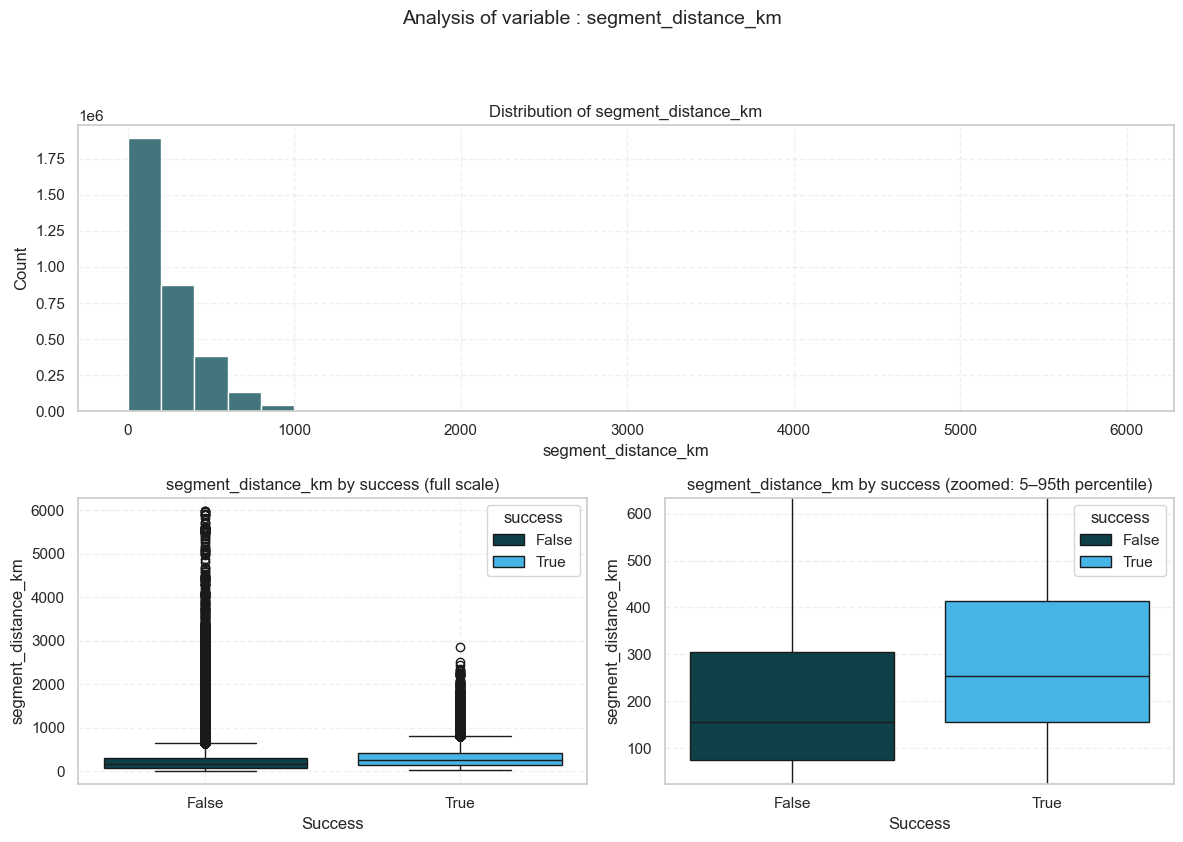

Mean of segment_distance_km - Success : 305.10 | Failure : 220.87
Median of segment_distance_km - Success : 253.00 | Failure : 156.00
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.40



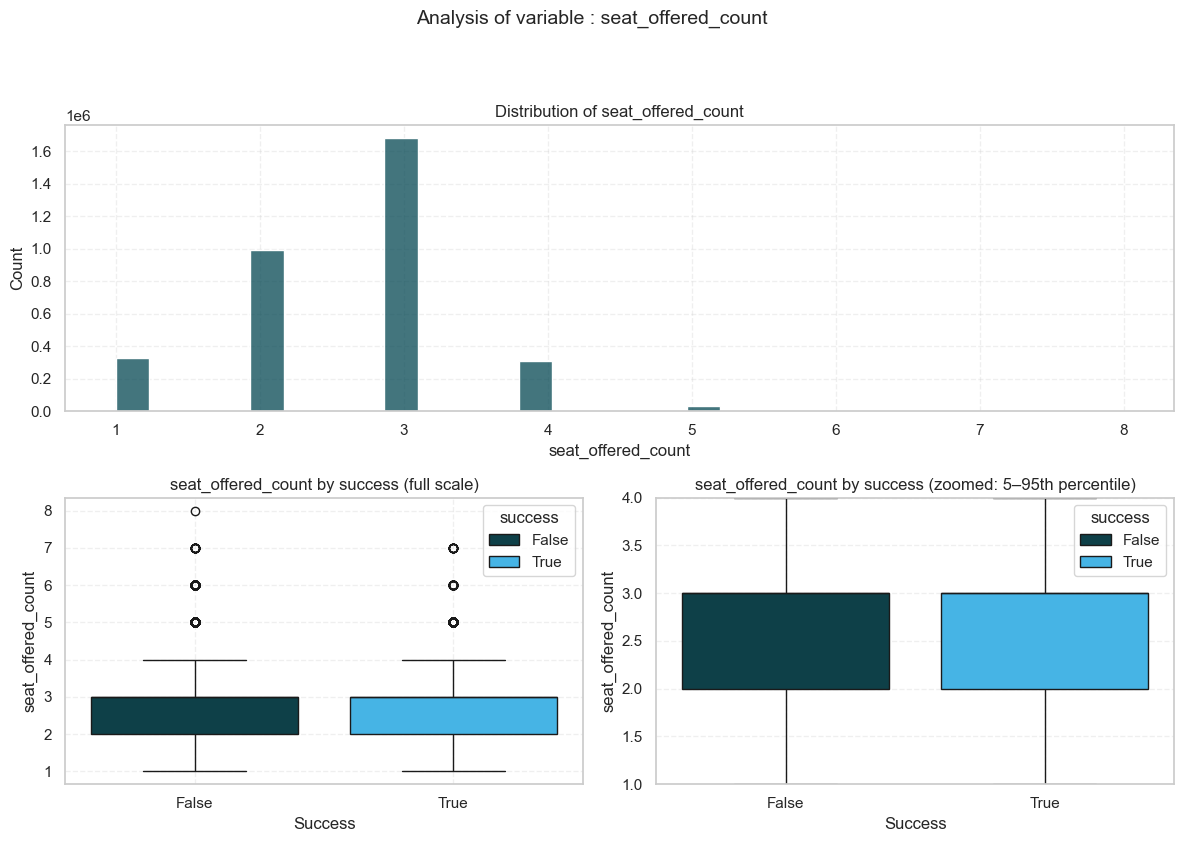

Mean of seat_offered_count - Success : 2.69 | Failure : 2.61
Median of seat_offered_count - Success : 3.00 | Failure : 3.00
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.10



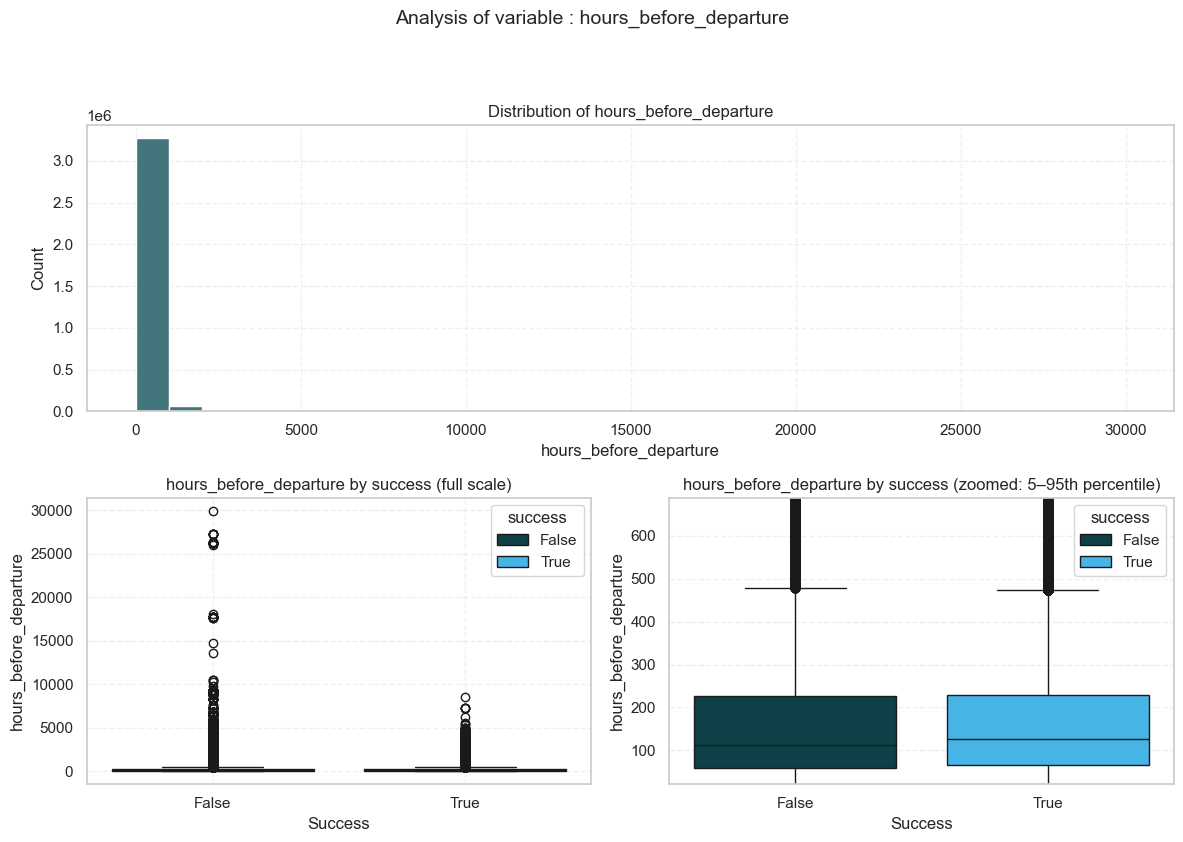

Mean of hours_before_departure - Success : 200.04 | Failure : 204.96
Median of hours_before_departure - Success : 126.33 | Failure : 112.75
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : -0.02



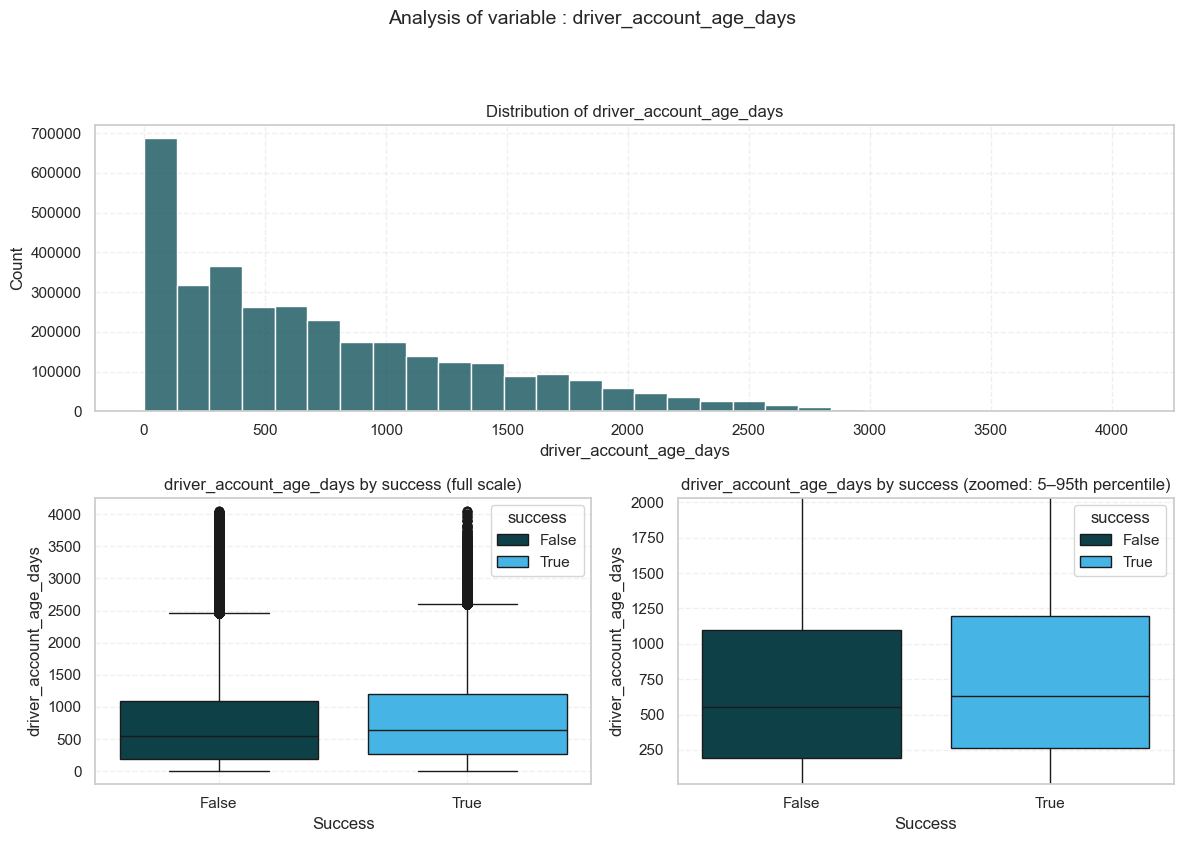

Mean of driver_account_age_days - Success : 787.15 | Failure : 721.67
Median of driver_account_age_days - Success : 634.00 | Failure : 551.00
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.10



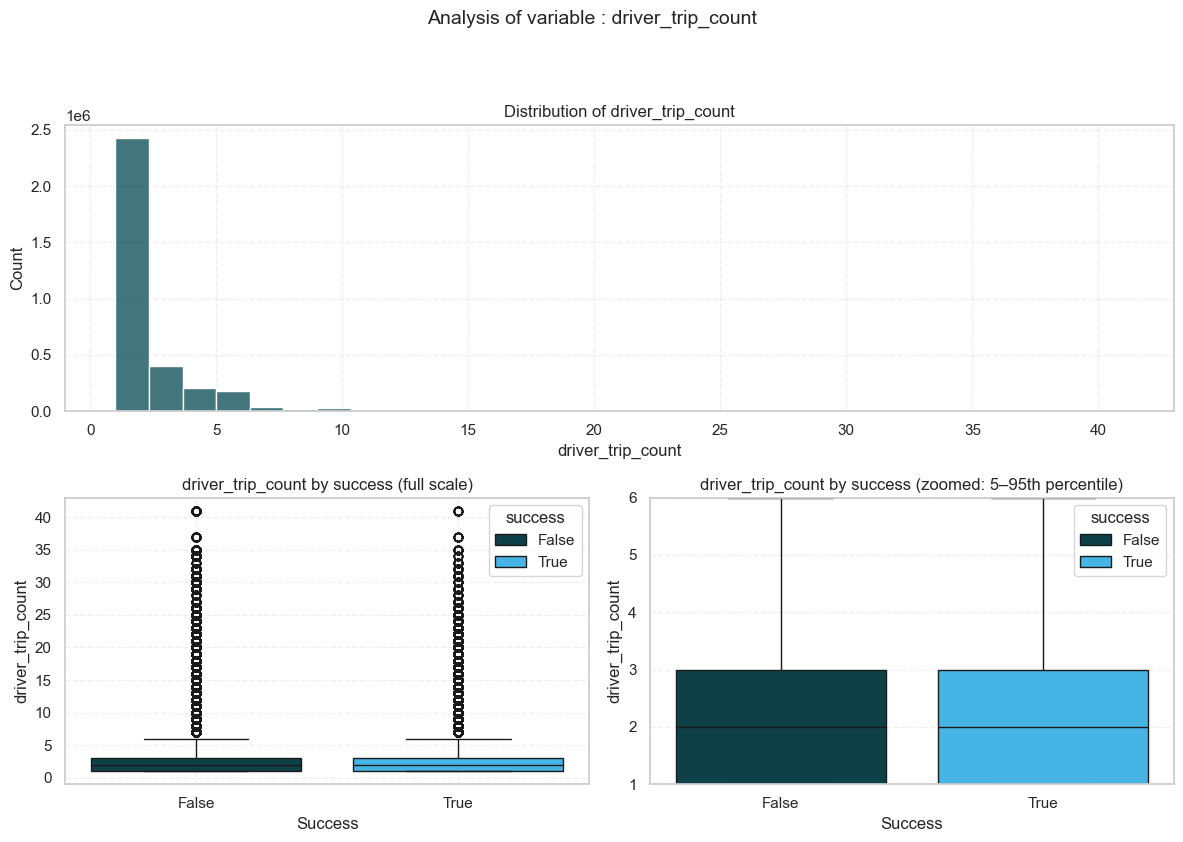

Mean of driver_trip_count - Success : 2.47 | Failure : 2.28
Median of driver_trip_count - Success : 2.00 | Failure : 2.00
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.08



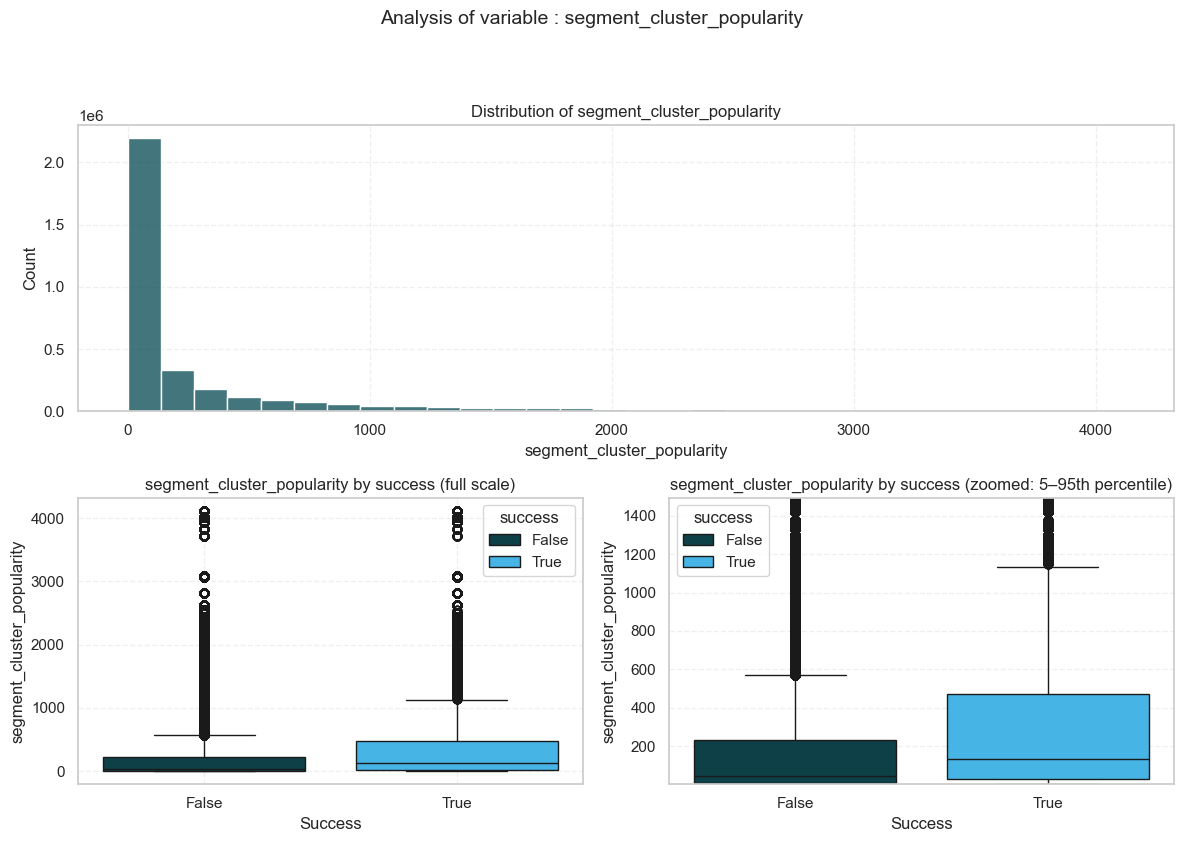

Mean of segment_cluster_popularity - Success : 396.57 | Failure : 268.83
Median of segment_cluster_popularity - Success : 133.00 | Failure : 43.00
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.23



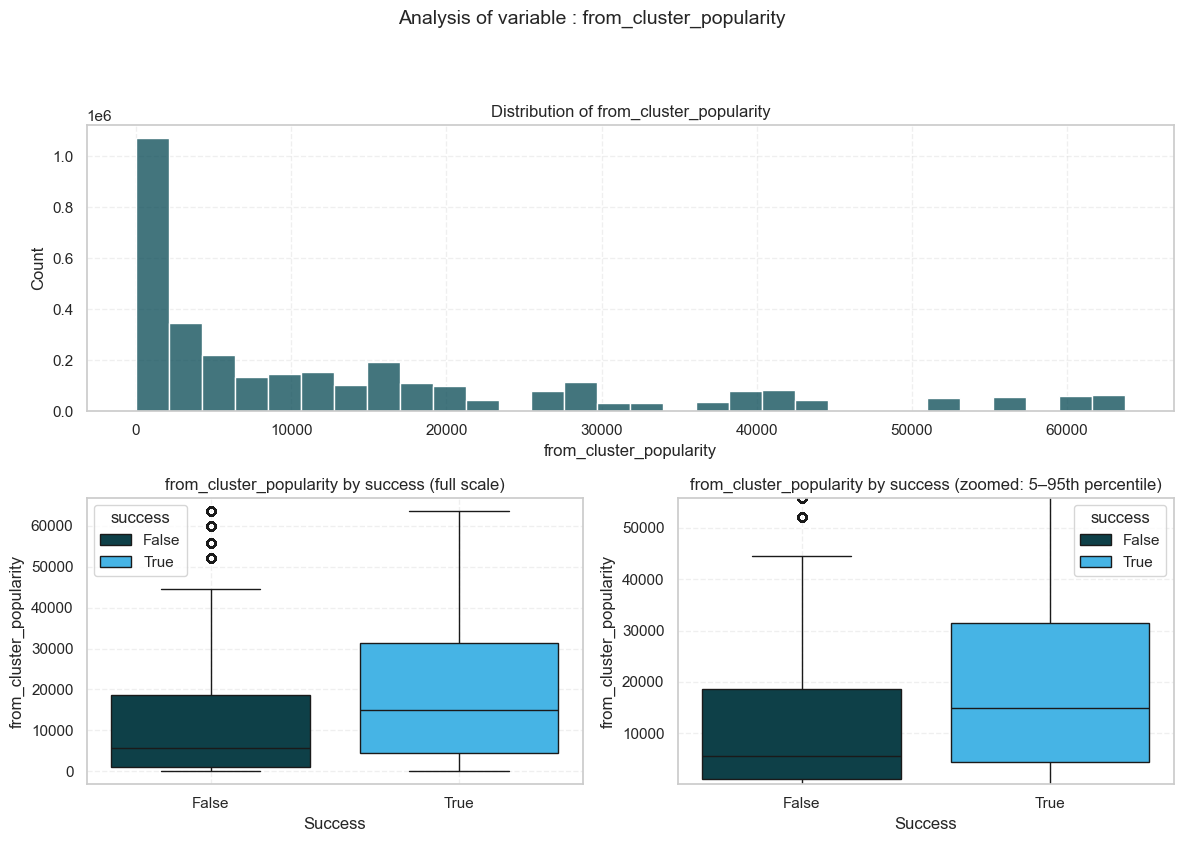

Mean of from_cluster_popularity - Success : 20648.71 | Failure : 13236.46
Median of from_cluster_popularity - Success : 14973.00 | Failure : 5593.00
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.44



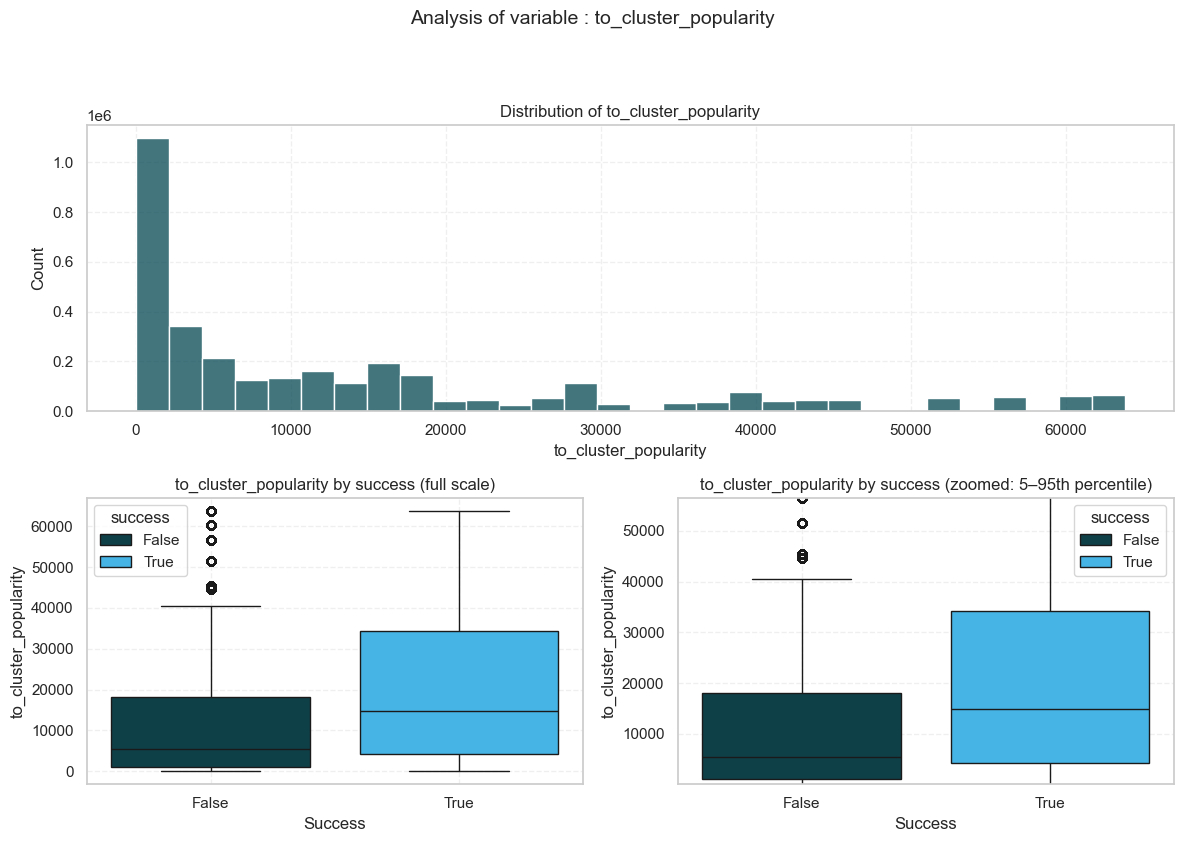

Mean of to_cluster_popularity - Success : 20659.88 | Failure : 13148.40
Median of to_cluster_popularity - Success : 14831.00 | Failure : 5460.00
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.45



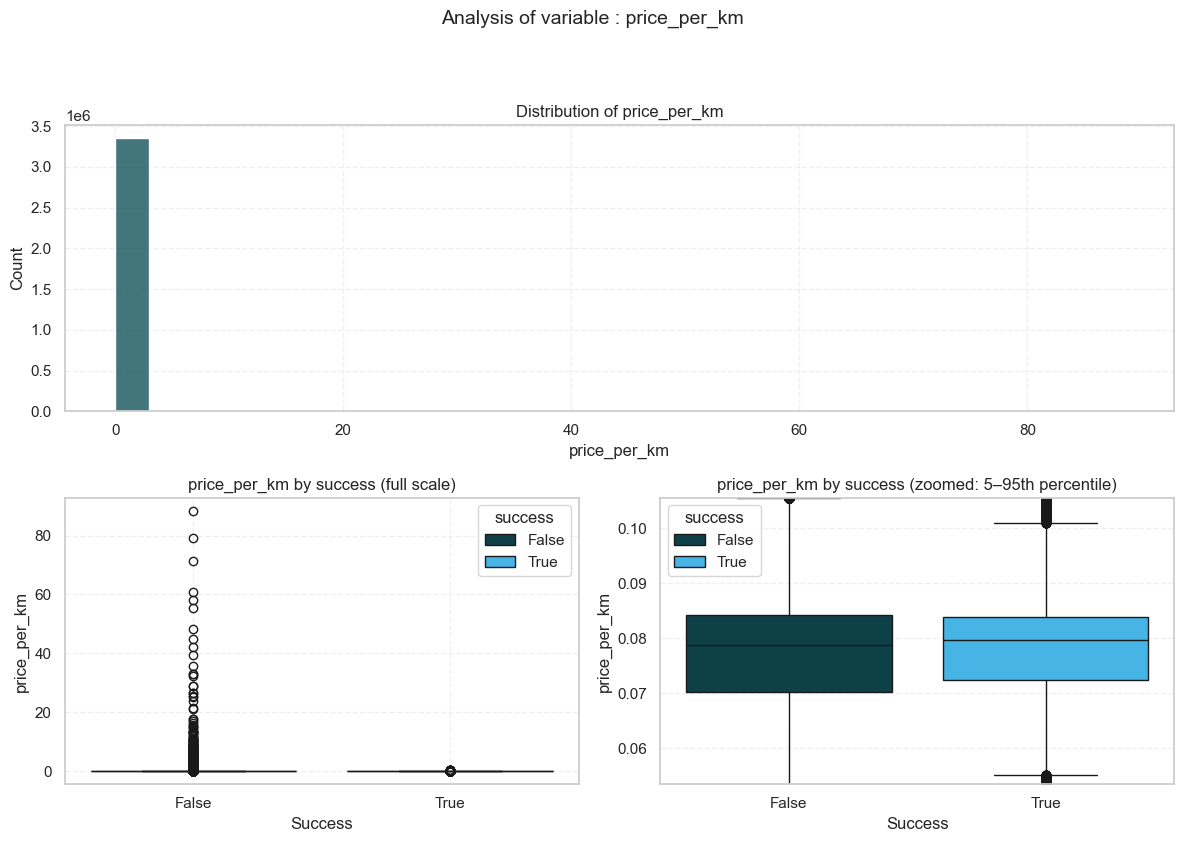

Mean of price_per_km - Success : 0.08 | Failure : 0.08
Median of price_per_km - Success : 0.08 | Failure : 0.08
  Mann-Whitney p-value : 1.2617e-125
  Cohen's d : -0.03



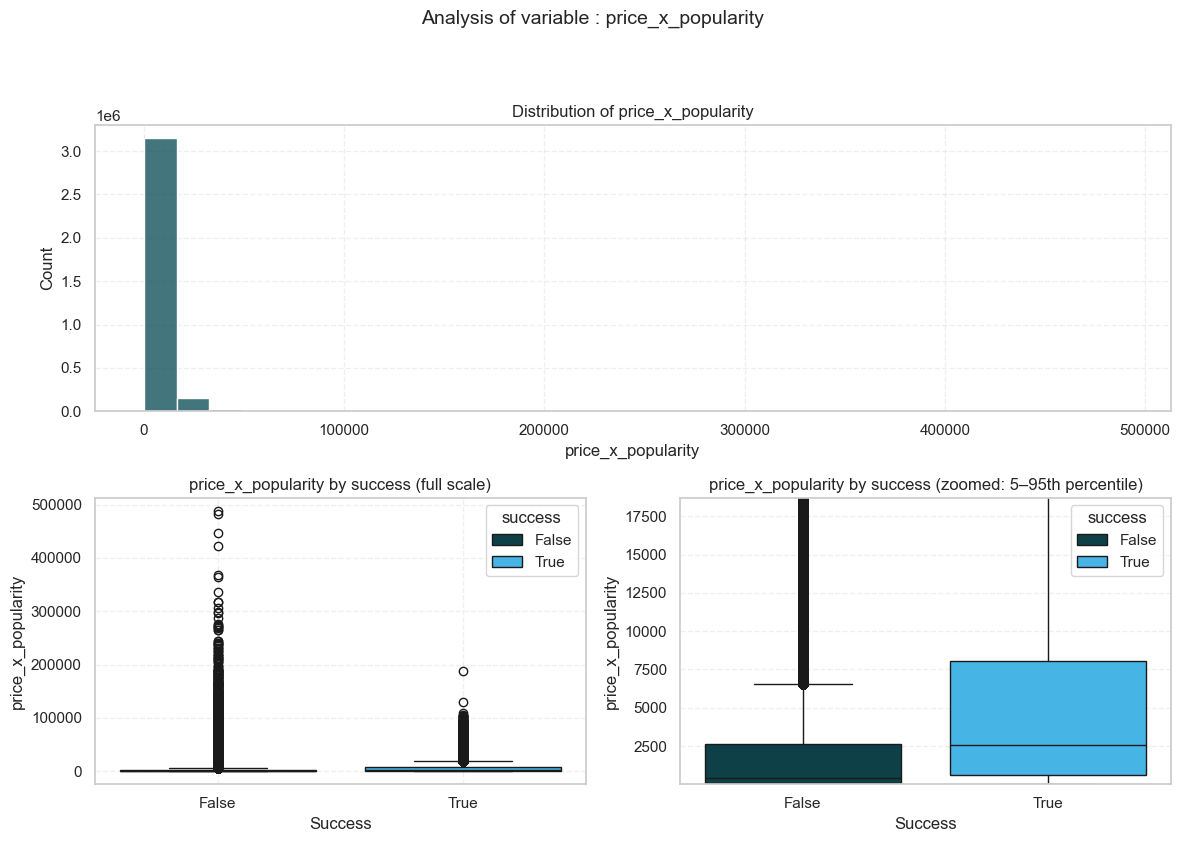

Mean of price_x_popularity - Success : 6566.23 | Failure : 3363.48
Median of price_x_popularity - Success : 2550.24 | Failure : 406.56
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.38



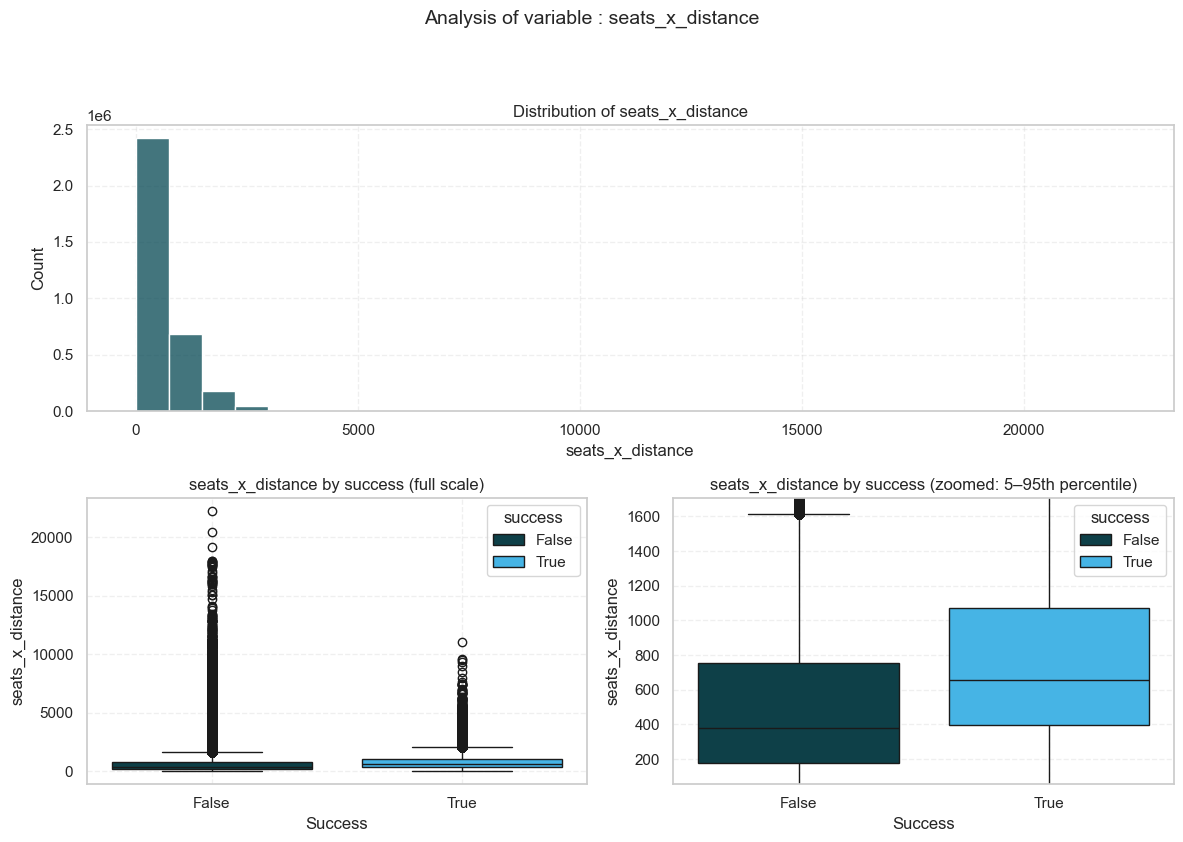

Mean of seats_x_distance - Success : 805.48 | Failure : 563.69
Median of seats_x_distance - Success : 656.00 | Failure : 382.00
  Mann-Whitney p-value : 0.0000e+00
  Cohen's d : 0.41



In [6]:
quant_vars = [
    'unit_seat_price_eur',
    'segment_distance_km',
    'seat_offered_count',
    'hours_before_departure',
    'driver_account_age_days', 
    'driver_trip_count',
    'segment_cluster_popularity',
    'from_cluster_popularity', 
    'to_cluster_popularity', 
    'price_per_km',
    'price_x_popularity', 
    'seats_x_distance'
]

for var in quant_vars:
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 2)

    # Global distribution
    ax1 = fig.add_subplot(gs[0, :])
    sns.histplot(df[var], bins=30, kde=False, ax=ax1, color='#044752')
    ax1.set_title(f"Distribution of {var}")
    ax1.set_xlabel(var)
    ax1.grid(True, linestyle='--', alpha=0.3)

    # Boxplot
    ax2 = fig.add_subplot(gs[1, 0])
    sns.boxplot(x='success', y=var, data=df, ax=ax2, palette=['#044752', '#2CBEFF'], hue='success')
    ax2.set_title(f"{var} by success (full scale)")
    ax2.set_xlabel("Success")
    ax2.set_ylabel(var)
    ax2.grid(True, linestyle='--', alpha=0.3)

    # Boxplot zoomed
    ax3 = fig.add_subplot(gs[1, 1])
    p5, p95 = np.percentile(df[var], [5, 95])
    sns.boxplot(x='success', y=var, data=df, ax=ax3, palette=['#044752', '#2CBEFF'], hue='success')
    ax3.set_ylim(p5, p95)
    ax3.set_title(f"{var} by success (zoomed: 5–95th percentile)")
    ax3.set_xlabel("Success")
    ax3.set_ylabel(var)
    ax3.grid(True, linestyle='--', alpha=0.3)

    plt.suptitle(f"Analysis of variable : {var}", fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

    # Statistics
    mean_success = df[df['success'] == 1][var].mean()
    mean_failure = df[df['success'] == 0][var].mean()
    print(f"Mean of {var} - Success : {mean_success:.2f} | Failure : {mean_failure:.2f}")
    med_success = df[df['success'] == 1][var].median()
    med_failure = df[df['success'] == 0][var].median()
    print(f"Median of {var} - Success : {med_success:.2f} | Failure : {med_failure:.2f}")

    # Mann-Whitney test (non parametric)
    stat, p = mannwhitneyu(df[df['success'] == 1][var], df[df['success'] == 0][var], alternative='two-sided')
    print(f"  Mann-Whitney p-value : {p:.4e}")

    # Cohen's d (effect size)
    d = compute_cohens_d(df[df['success'] == 1][var], df[df['success'] == 0][var])
    print(f"  Cohen's d : {d:.2f}\n")

In [6]:
# Cohen’s d	Interprétation
# 0 – 0.2	Effet très faible
# 0.2 – 0.5	Petit effet
# 0.5 – 0.8	Effet modéré
# > 0.8	Gros effet

Features that seem to have an impact on success:

- 'unit_seat_price_eur', 0.38
- 'segment_distance_km', 0.40
- 'segment_cluster_popularity', 0.23
- 'from_cluster_popularity', 0.44
- 'to_cluster_popularity', 0.45
- 'price_x_popularity', 0.38
- 'seats_x_distance' 0.41

Price and distance have a strong effect on success because they represent two key and distinct dimensions perceived by buyers. On the other hand, Price per km crushes this information into a single value, which loses readability and relevance: two very different cars can have the same ratio, but very different appeal. This ratio is therefore not a good predictor in itself, especially in a linear approach.

### Temporal variables

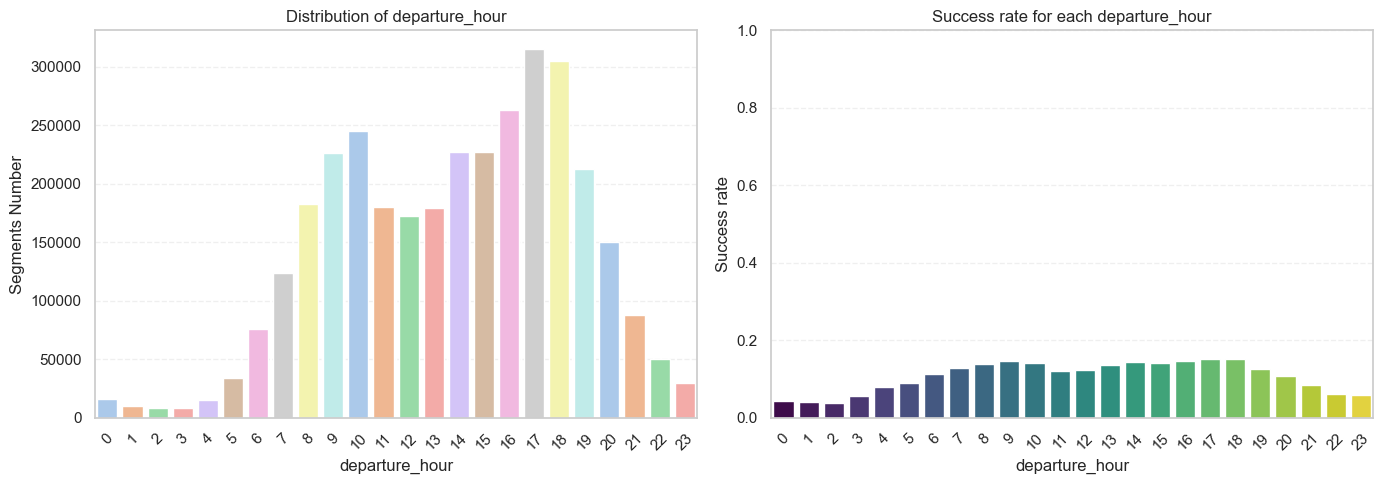

Chi² p-value for departure_hour: 0.0000
Cramér's V for departure_hour: 0.065


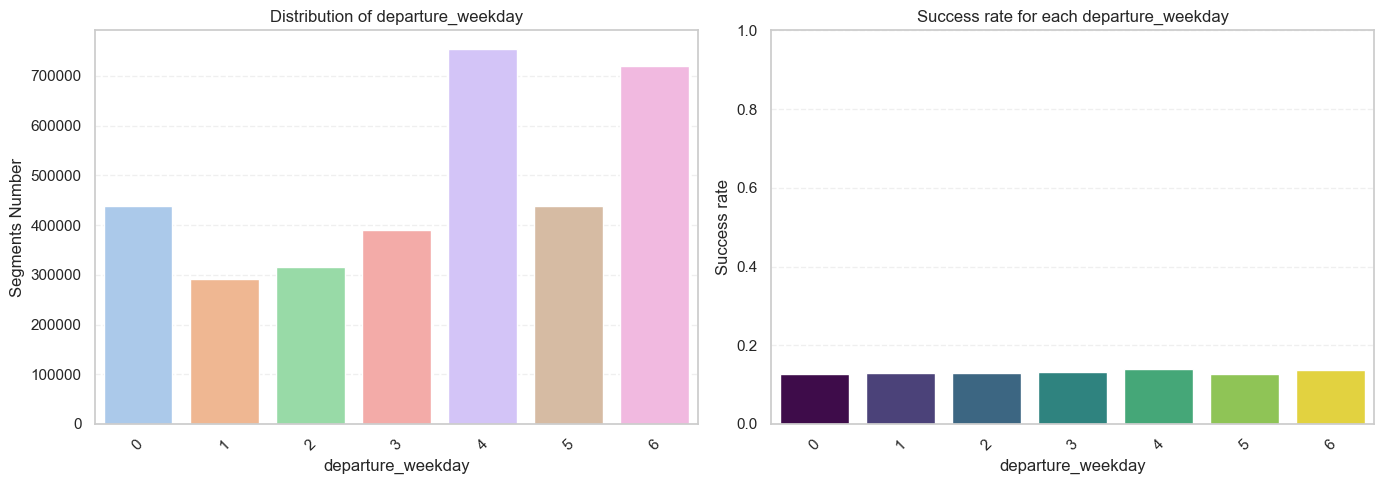

Chi² p-value for departure_weekday: 0.0000
Cramér's V for departure_weekday: 0.014


In [7]:
temporal_vars = [
    'departure_hour',
    'departure_weekday',
]

for var in temporal_vars:
    plot_categorical_analysis(var, df, "Success rate for each " + var)

In [8]:
# Interprétation de Cramér's V :
# < 0.1 : effet négligeable
# 0.1 – 0.3 : effet faible
# 0.3 – 0.5 : effet modéré
# > 0.5 : fort effet

Some temporal variables (such as departure time) visually show variations in success rates - for example, at peak times - but statistical tests (very low p-values, but Cramér's V < 0.1) indicate that the overall influence of these variables remains low. They therefore explain only a very marginal part of the variability in success.

### Categorical variables

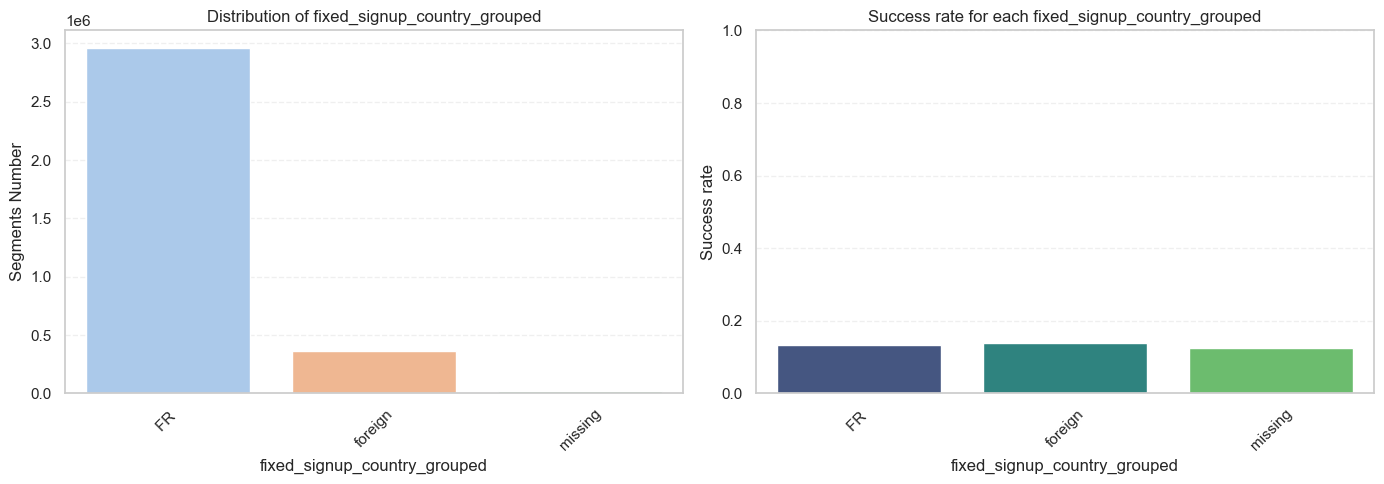

Chi² p-value for fixed_signup_country_grouped: 0.0000
Cramér's V for fixed_signup_country_grouped: 0.005


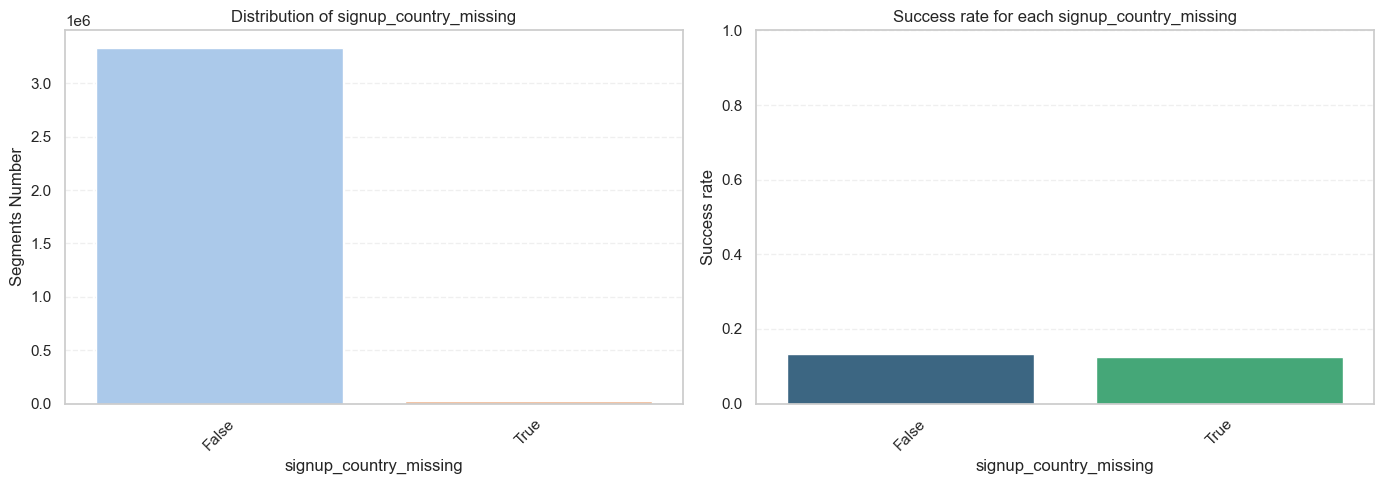

Chi² p-value for signup_country_missing: 0.0002
Cramér's V for signup_country_missing: 0.002


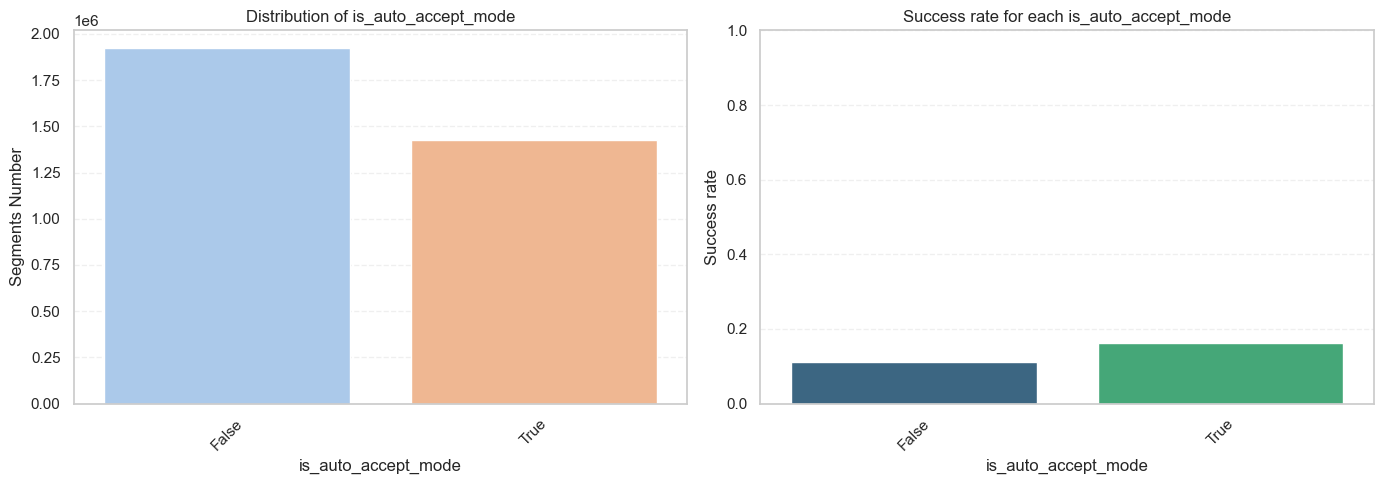

Chi² p-value for is_auto_accept_mode: 0.0000
Cramér's V for is_auto_accept_mode: 0.077


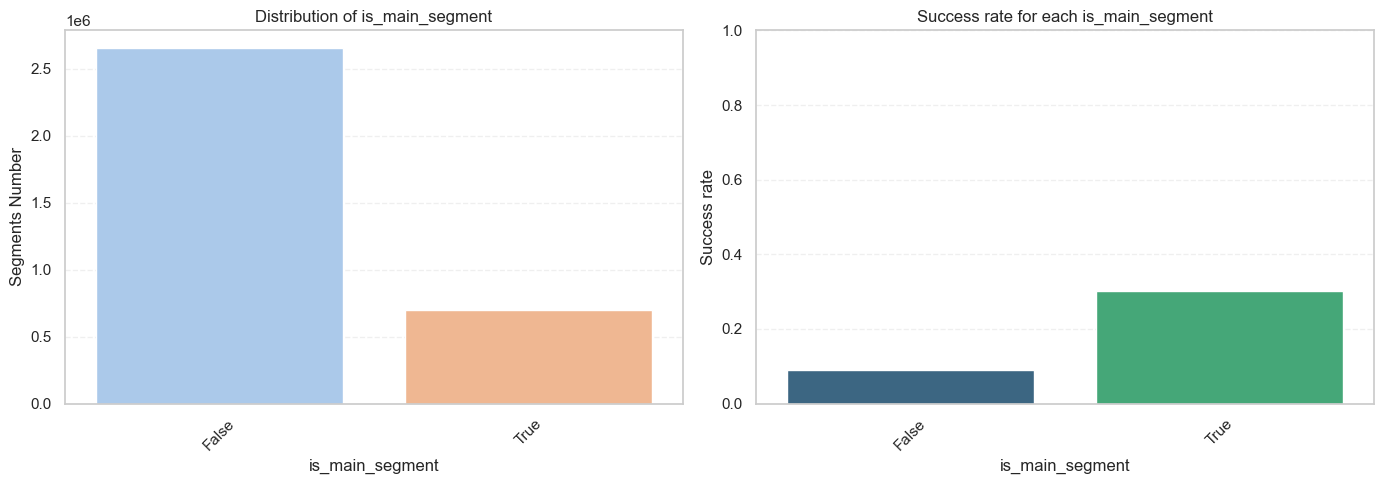

Chi² p-value for is_main_segment: 0.0000
Cramér's V for is_main_segment: 0.255


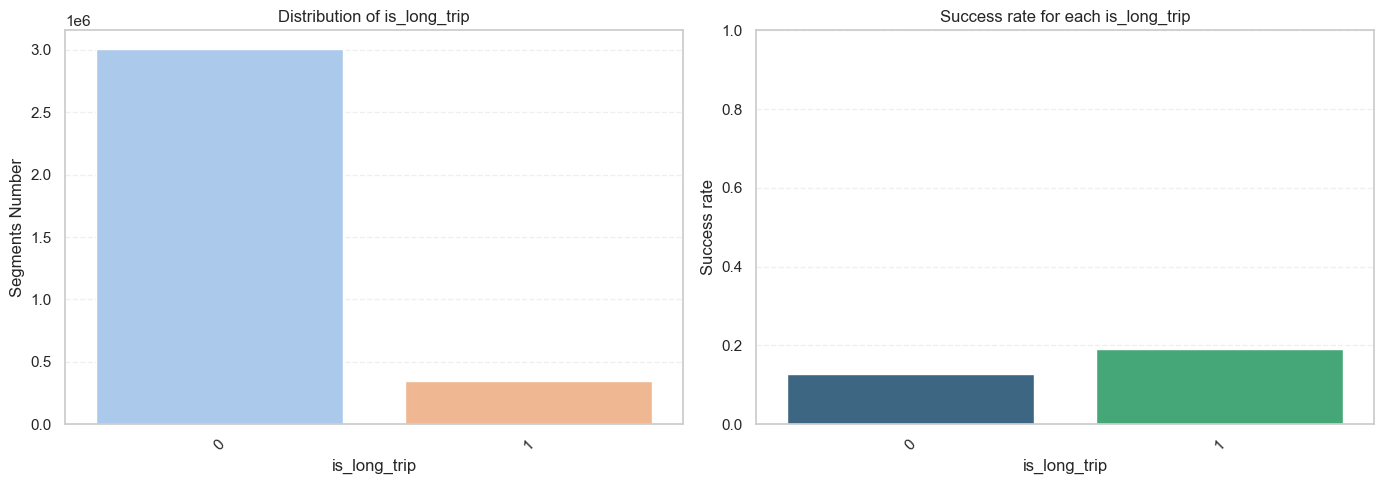

Chi² p-value for is_long_trip: 0.0000
Cramér's V for is_long_trip: 0.057


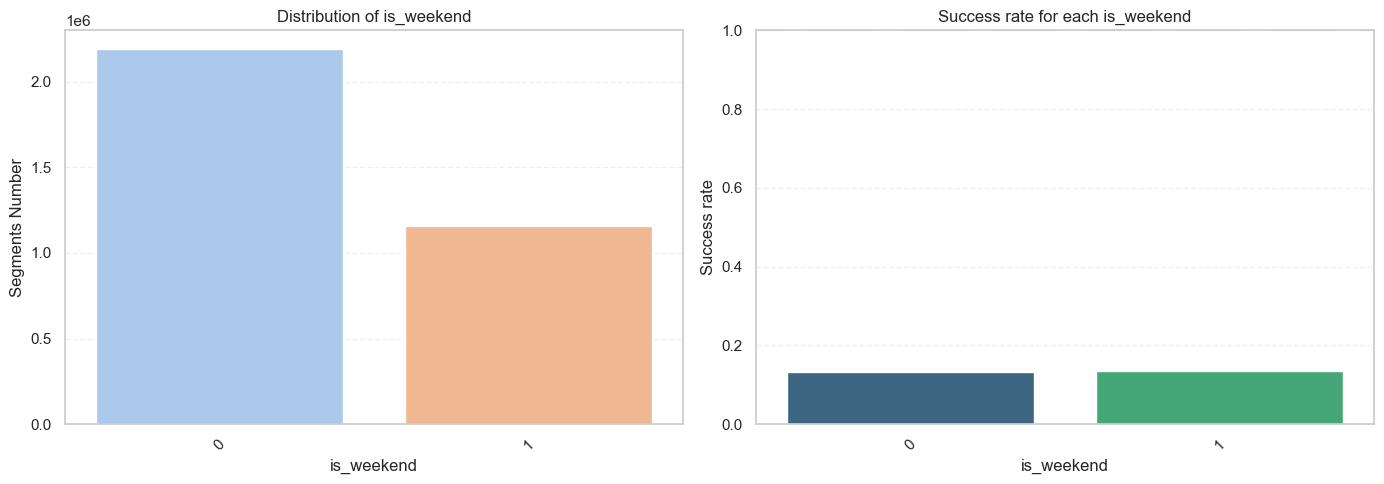

Chi² p-value for is_weekend: 0.0310
Cramér's V for is_weekend: 0.001


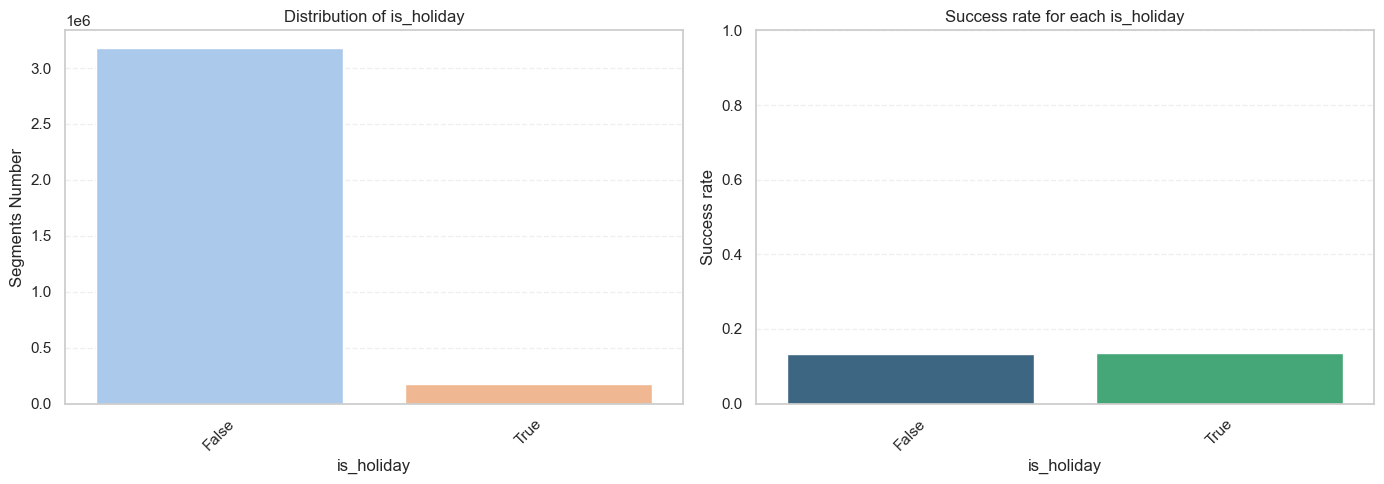

Chi² p-value for is_holiday: 0.0000
Cramér's V for is_holiday: 0.002


In [9]:
categorical_vars = [
    # 'publication_site_id',
    'fixed_signup_country_grouped',
    'signup_country_missing', 
    'is_auto_accept_mode',
    'is_main_segment', 
    'is_long_trip', 
    'is_weekend', 
    'is_holiday'
]

for var in categorical_vars:
    plot_categorical_analysis(var, df, "Success rate for each " + var)

Important features : 
- is_main_segment 0.255

## Trips visualization

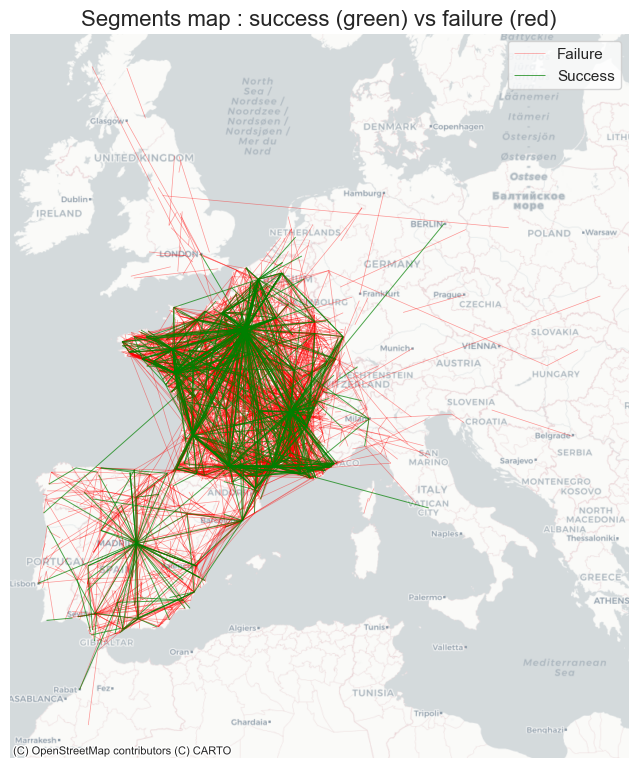

In [10]:
# Subsampling to avoid overloading the map
sample_df = df.sample(5000, random_state=42)

sample_df['geometry'] = sample_df.apply(
    lambda row: LineString([(row['from_lon'], row['from_lat']), (row['to_lon'], row['to_lat'])]),
    axis=1
)

# Creation of the GeoDataFrame
gdf = gpd.GeoDataFrame(sample_df, geometry='geometry', crs='EPSG:4326')
gdf = gdf.to_crs(epsg=3857)

gdf_success = gdf[gdf['success'] == 1]
gdf_fail = gdf[gdf['success'] == 0]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
gdf_fail.plot(ax=ax, color='red', linewidth=0.5, alpha=0.4, label='Failure')
gdf_success.plot(ax=ax, color='green', linewidth=0.7, alpha=0.7, label='Success')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.set_title("Segments map : success (green) vs failure (red)", fontsize=16)
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

The map above illustrates ride segments with successful trips highlighted in green and unsuccessful ones in red. Noticeable green hubs appear around major cities, indicating that popular routes in these areas tend to have higher success rates. This spatial visualization helps identify geographic zones where demand and trip completion are strongest, providing valuable insights for optimizing service coverage and targeting high-potential routes.

## Heatmap

To complement the statistical analysis, I computed a correlation matrix including the success. This helped identify which features are most correlated with the outcome, giving us an initial idea of which variables may influence ride success and confirming the observations above. While correlation does not imply causation, it provided useful insights into the relationships between features and helped guide the feature selection and modeling choices.

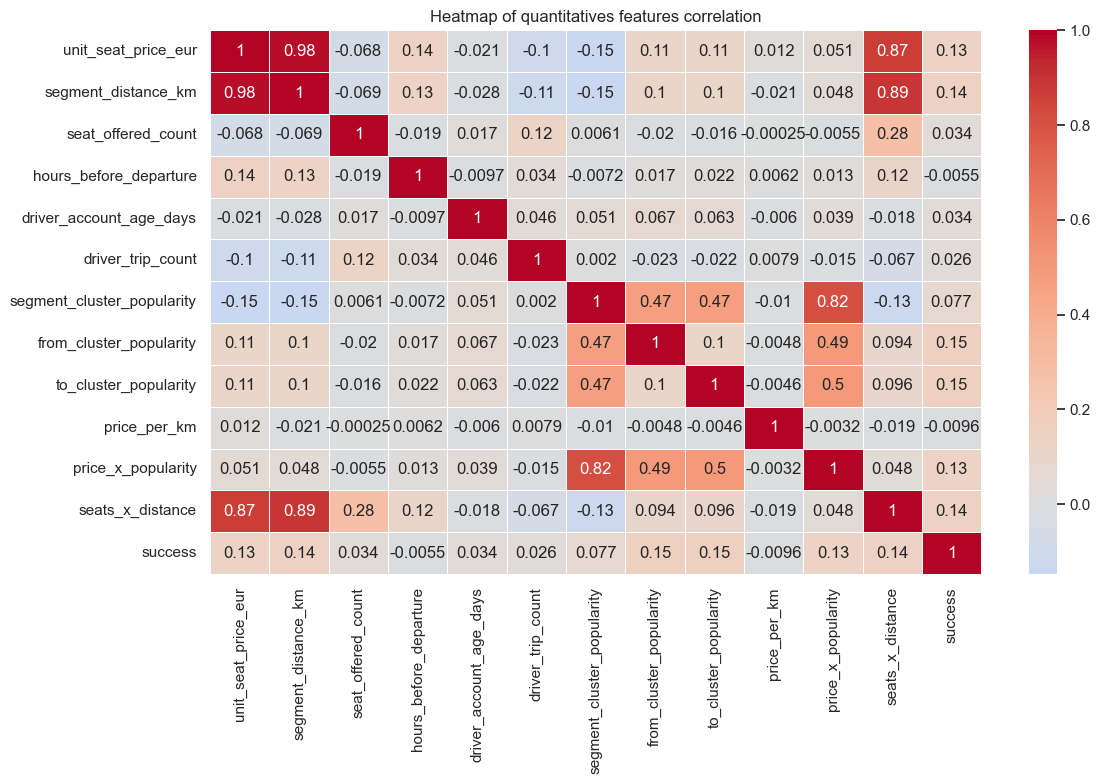

In [11]:
quant_vars_plus_target = quant_vars + ['success']

# Correlation
corr_matrix = df[quant_vars_plus_target].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Heatmap of quantitatives features correlation")
plt.tight_layout()
plt.show()


Features the most correlated with success according to heatmap : 
- from_cluster_popularity
- to_cluster_popularity
- seats_x_distance
- segment_distance_km
- unit_seat_price_eur
- price_x_popularity


Thanks to a combination of distribution visualizations, statistical tests, effect size analysis and correlation matrix, we identified several features that appear to be strongly associated with ride success, including departure and arrival zone popularity, trip distance, seat-distance interaction, unit seat price, the interaction between price and route popularity, and whether the trip is the main segment or not.